In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "https://www.airlinequality.com/airline-reviews/british-airways"


In [4]:
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


In [5]:
reviews = []
review_containers = soup.find_all("li", class_="review")

for review in review_containers:
    review_text = review.find("div", class_="text_content")
    if review_text is not None:
        review_text = review_text.get_text(strip=True)
    else:
        review_text = "N/A"
    
    rating = review.find("div", class_="rating-10")
    if rating is not None:
        rating = rating.get_text(strip=True)
    else:
        rating = "N/A"
    
    date = review.find("time", class_="review-date")
    if date is not None:
        date = date.get("datetime")
    else:
        date = "N/A"
    
    reviews.append({"Review": review_text, "Rating": rating, "Date": date})



In [6]:
df = pd.DataFrame(reviews)
print(df)

Empty DataFrame
Columns: []
Index: []


In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Terrible Experience with Bri...
1,✅ Trip Verified | An airline that lives in the...
2,✅ Trip Verified | Check-in Desk rude and dism...
3,✅ Trip Verified | I chose British Airways espe...
4,Not Verified | I booked Premium Economy from I...


In [9]:
df

,reviews
0,✅ Trip Verified | Terrible Experience with Bri...
1,✅ Trip Verified | An airline that lives in the...
2,✅ Trip Verified | Check-in Desk rude and dism...
3,✅ Trip Verified | I chose British Airways espe...
4,Not Verified | I booked Premium Economy from I...
...,...
995,"✅ Trip Verified | \r\nBA34 KUL-LHR 6 Sept, ret..."
996,✅ Trip Verified | We flew from Los Angeles to ...
997,✅ Trip Verified | Brindisi to London. Flying ...
998,✅ Trip Verified | Chicago to London. I have f...


In [10]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,✅ Trip Verified | Terrible Experience with Bri...,Trip Verified Terrible Experience with Britis...
1,✅ Trip Verified | An airline that lives in the...,Trip Verified An airline that lives in their ...
2,✅ Trip Verified | Check-in Desk rude and dism...,Trip Verified Check in Desk rude and dismissi...
3,✅ Trip Verified | I chose British Airways espe...,Trip Verified I chose British Airways especia...
4,Not Verified | I booked Premium Economy from I...,Not Verified I booked Premium Economy from INV...


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,✅ Trip Verified | Terrible Experience with Bri...,Trip Verified Terrible Experience with Britis...,"[(Trip, n), (Verified, n), (Terrible, n), (Exp..."
1,✅ Trip Verified | An airline that lives in the...,Trip Verified An airline that lives in their ...,"[(Trip, n), (Verified, v), (airline, n), (live..."
2,✅ Trip Verified | Check-in Desk rude and dism...,Trip Verified Check in Desk rude and dismissi...,"[(Trip, n), (Verified, n), (Check, n), (Desk, ..."
3,✅ Trip Verified | I chose British Airways espe...,Trip Verified I chose British Airways especia...,"[(Trip, n), (Verified, n), (chose, v), (Britis..."
4,Not Verified | I booked Premium Economy from I...,Not Verified I booked Premium Economy from INV...,"[(Verified, n), (booked, v), (Premium, n), (Ec..."


In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | Terrible Experience with Bri...,Trip Verified Terrible Experience with Britis...,"[(Trip, n), (Verified, n), (Terrible, n), (Exp...",Trip Verified Terrible Experience British Ai...
1,✅ Trip Verified | An airline that lives in the...,Trip Verified An airline that lives in their ...,"[(Trip, n), (Verified, v), (airline, n), (live...",Trip Verified airline live past glory head f...
2,✅ Trip Verified | Check-in Desk rude and dism...,Trip Verified Check in Desk rude and dismissi...,"[(Trip, n), (Verified, n), (Check, n), (Desk, ...",Trip Verified Check Desk rude dismissive Fli...
3,✅ Trip Verified | I chose British Airways espe...,Trip Verified I chose British Airways especia...,"[(Trip, n), (Verified, n), (chose, v), (Britis...",Trip Verified choose British Airways especia...
4,Not Verified | I booked Premium Economy from I...,Not Verified I booked Premium Economy from INV...,"[(Verified, n), (booked, v), (Premium, n), (Ec...",Verified book Premium Economy INV LAX via LH...


In [14]:
!pip install vaderSentiment

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Terrible Experience with Bri...,Trip Verified Terrible Experience with Britis...,"[(Trip, n), (Verified, n), (Terrible, n), (Exp...",Trip Verified Terrible Experience British Ai...,0.8698,Positive
1,✅ Trip Verified | An airline that lives in the...,Trip Verified An airline that lives in their ...,"[(Trip, n), (Verified, v), (airline, n), (live...",Trip Verified airline live past glory head f...,-0.7351,Negative
2,✅ Trip Verified | Check-in Desk rude and dism...,Trip Verified Check in Desk rude and dismissi...,"[(Trip, n), (Verified, n), (Check, n), (Desk, ...",Trip Verified Check Desk rude dismissive Fli...,-0.6705,Negative
3,✅ Trip Verified | I chose British Airways espe...,Trip Verified I chose British Airways especia...,"[(Trip, n), (Verified, n), (chose, v), (Britis...",Trip Verified choose British Airways especia...,-0.8074,Negative
4,Not Verified | I booked Premium Economy from I...,Not Verified I booked Premium Economy from INV...,"[(Verified, n), (booked, v), (Premium, n), (Ec...",Verified book Premium Economy INV LAX via LH...,-0.5719,Negative


In [16]:
df

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Terrible Experience with Bri...,Trip Verified Terrible Experience with Britis...,"[(Trip, n), (Verified, n), (Terrible, n), (Exp...",Trip Verified Terrible Experience British Ai...,0.8698,Positive
1,✅ Trip Verified | An airline that lives in the...,Trip Verified An airline that lives in their ...,"[(Trip, n), (Verified, v), (airline, n), (live...",Trip Verified airline live past glory head f...,-0.7351,Negative
2,✅ Trip Verified | Check-in Desk rude and dism...,Trip Verified Check in Desk rude and dismissi...,"[(Trip, n), (Verified, n), (Check, n), (Desk, ...",Trip Verified Check Desk rude dismissive Fli...,-0.6705,Negative
3,✅ Trip Verified | I chose British Airways espe...,Trip Verified I chose British Airways especia...,"[(Trip, n), (Verified, n), (chose, v), (Britis...",Trip Verified choose British Airways especia...,-0.8074,Negative
4,Not Verified | I booked Premium Economy from I...,Not Verified I booked Premium Economy from INV...,"[(Verified, n), (booked, v), (Premium, n), (Ec...",Verified book Premium Economy INV LAX via LH...,-0.5719,Negative
...,...,...,...,...,...,...
995,"✅ Trip Verified | \r\nBA34 KUL-LHR 6 Sept, ret...",Trip Verified BA KUL LHR Sept return BA LHR S...,"[(Trip, n), (Verified, n), (BA, n), (KUL, n), ...",Trip Verified BA KUL LHR Sept return BA LHR ...,0.9459,Positive
996,✅ Trip Verified | We flew from Los Angeles to ...,Trip Verified We flew from Los Angeles to Lee...,"[(Trip, n), (Verified, n), (flew, v), (Los, n)...",Trip Verified fly Los Angeles Leeds Bradford...,0.2263,Neutral
997,✅ Trip Verified | Brindisi to London. Flying ...,Trip Verified Brindisi to London Flying from ...,"[(Trip, n), (Verified, n), (Brindisi, n), (Lon...",Trip Verified Brindisi London Flying airport...,0.3612,Neutral
998,✅ Trip Verified | Chicago to London. I have f...,Trip Verified Chicago to London I have flown ...,"[(Trip, n), (Verified, n), (Chicago, n), (Lond...",Trip Verified Chicago London fly long haul m...,0.5988,Positive


In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts



Positive    497
Negative    395
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x195b2d98f70>,
 [Text(0.01036707179294032, 1.0999511461071534, 'Positive'),
  Text(-0.3758612265358838, -1.0337931796964717, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.005654766432512902, 0.5999733524220836, '49.7%'),
  Text(-0.20501521447411838, -0.5638871889253481, '39.5%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

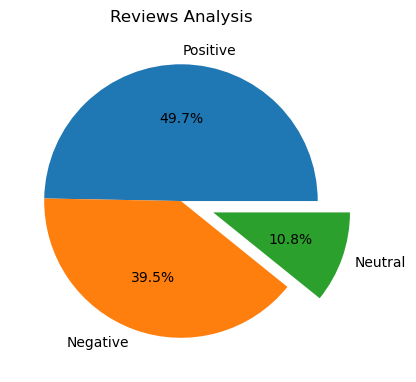

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


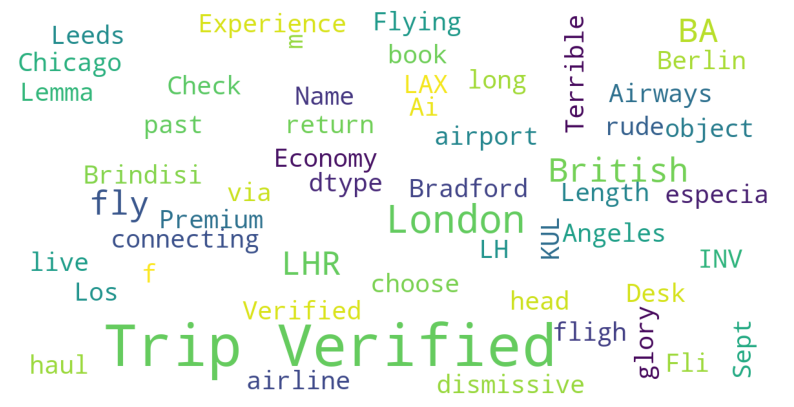

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

In [21]:
df.to_csv("BA_reviews.csv")